### Importing the requisite libraries

In [ ]:
# importing the requisite libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from linear_regression import (load_advertising_data,train_linear_model,regression_metrics)
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')


### 1.1 Simple Linear Regression

#### Build a model using TV spend on advertisements to predict sales

In [2]:
# Reading the dataset

df = pd.read_csv('C:/Users/roshi/Desktop/Lenovo/advertising.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
data = df[["TV", "Sales"]]
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


<Axes: xlabel='TV', ylabel='Sales'>

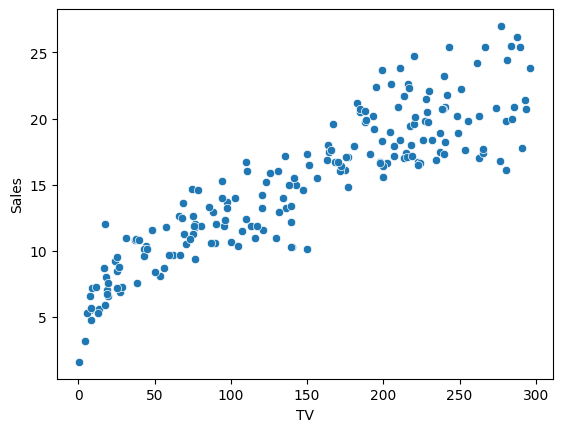

In [5]:
# Plotting a scatter plot to know the relationship between TV and sales

sns.scatterplot( data = data , x = 'TV' , y = 'Sales')

The relationship between the two variables seems to be linear.

In [6]:
# Splitting the dataset into X and y
X = np.array(data['TV']).reshape(-1,1) # predictor variable
y = np.array(data['Sales']).reshape(-1,1) # response variable

In [7]:
# Building the regression model
reg = LinearRegression()
reg.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
# Predictions on the basis of the model
y_pred = reg.predict(X)
# y_pred

In [9]:
# Find the value of r squared
r2_score(y , y_pred)
# The advertising spends on TV explain about 81.21% of the variation in the Sales

0.8121757029987414

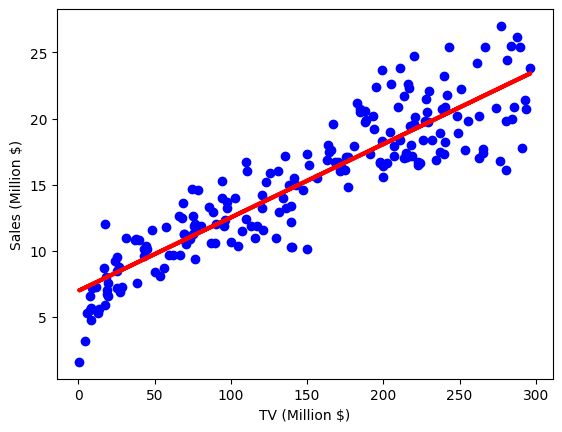

In [10]:
# Visualizing the model fit
plt.scatter( X , y , color = 'blue')
plt.plot(X , y_pred , color = 'red' , linewidth = 3)
plt.xlabel("TV (Million $)")
plt.ylabel("Sales (Million $)")
plt.show()

In [11]:
# Model Coefficients: beta0 and beta1
print(reg.intercept_)
print(reg.coef_)

[6.97482149]
[[0.05546477]]


In [12]:
# Metrics to assess model performance 
rss = np.sum(np.square(y - y_pred)) # sum of the squared difference between the actual and the predicted values
print(rss)
mse = mean_squared_error(y, y_pred) # MSE is RSS divided by the number of observations
print(mse)
rmse = mse**0.5 # RMSE is square root of MSE 
print(rmse)

1043.5487795590257
5.2177438977951285
2.2842381438447106


#### Checking for assumptions

In [13]:
# Residual analysis
y_res = y - y_pred # Residuals

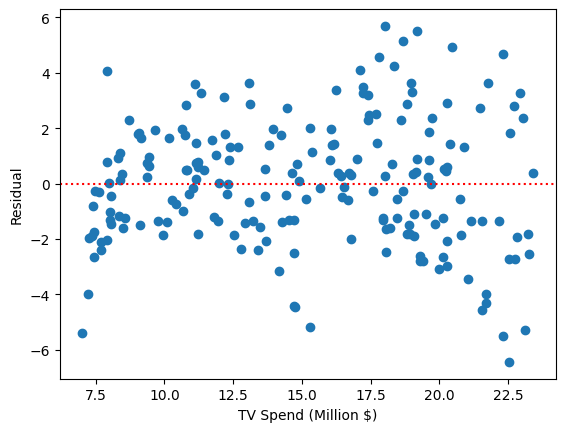

In [14]:
# Residual v/s predictions plot
data['res'] = y_res
plt.scatter( y_pred , data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("TV Spend (Million $)")
plt.ylabel("Residual")
plt.show()

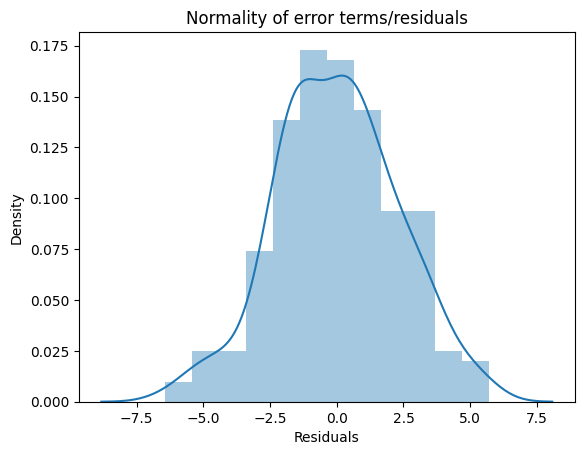

In [15]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Normal Equations

#### Regression Equation
$\hat{y_i} = b_{0} + b_{1}{x_i}$<br>
where slope of trend line is calculated as:<br>
$b_{1}=\frac{\sum (x_i-\bar{x})*(y_i-\bar{y})}{\sum (x_i-\bar{x})^{2}}$<br>
and the intercept is computed as:<br>
$b_{0}=\bar{y}-b_{1}\bar{x}$

In [16]:
# Computing X and Y
X = data['TV'].values # advertising spend on TV
Y = data['Sales'].values # Sales

In [17]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
 
# Total number of values
n = len(X)

In [18]:
# Using the formula to calculate 'b0' and 'b1'
numer = 0
denom = 0
for i in range(n): # for each observation in the data
  numer += (X[i] - mean_x) * (Y[i] - mean_y) # compute the expression and sum over all observations using for loop
  denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)
 
# Printing coefficients
print("Coefficients")
print(b0, b1)

Coefficients
6.974821488229903 0.05546477046955879


### Linear Regression Model Estimates using Matrix Multiplications

$\widehat{\beta}=(X^{T}.X)^{-1}.X^{T}.Y$

In [19]:
# Use NumPy’s vstack to create a 2-d numpy array from two 1d-arrays and create X_mat.
X_mat=np.vstack((np.ones(len(X)), X)).T

In [20]:
X_mat

array([[  1. , 230.1],
       [  1. ,  44.5],
       [  1. ,  17.2],
       [  1. , 151.5],
       [  1. , 180.8],
       [  1. ,   8.7],
       [  1. ,  57.5],
       [  1. , 120.2],
       [  1. ,   8.6],
       [  1. , 199.8],
       [  1. ,  66.1],
       [  1. , 214.7],
       [  1. ,  23.8],
       [  1. ,  97.5],
       [  1. , 204.1],
       [  1. , 195.4],
       [  1. ,  67.8],
       [  1. , 281.4],
       [  1. ,  69.2],
       [  1. , 147.3],
       [  1. , 218.4],
       [  1. , 237.4],
       [  1. ,  13.2],
       [  1. , 228.3],
       [  1. ,  62.3],
       [  1. , 262.9],
       [  1. , 142.9],
       [  1. , 240.1],
       [  1. , 248.8],
       [  1. ,  70.6],
       [  1. , 292.9],
       [  1. , 112.9],
       [  1. ,  97.2],
       [  1. , 265.6],
       [  1. ,  95.7],
       [  1. , 290.7],
       [  1. , 266.9],
       [  1. ,  74.7],
       [  1. ,  43.1],
       [  1. , 228. ],
       [  1. , 202.5],
       [  1. , 177. ],
       [  1. , 293.6],
       [  1

In [21]:
Y

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

$\widehat{\beta}=(X^{T}.X)^{-1}.X^{T}.Y$

In [22]:
# We can implement this using NumPy’s linalg module’s matrix inverse function and matrix multiplication function.
beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(Y)

In [23]:
beta_hat

array([6.97482149, 0.05546477])

### 1.2 Multiple Linear Regression


#### Predict the sales based on the expenditure on TV, Radio and Newspaper advertisements

In [24]:
# Reading the dataset
df = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/098bb2e9-83fb-48df-9dd1-fac56fbb25ca/advertising.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [26]:
# Inspecting the dataset
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [27]:
data  = df

<Axes: xlabel='TV', ylabel='Sales'>

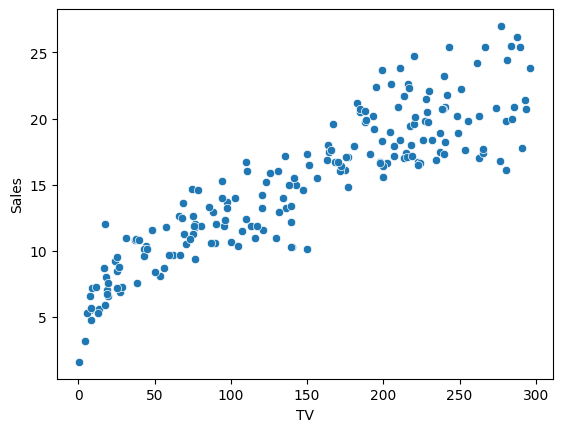

In [28]:
# Plotting a scatter plot

sns.scatterplot( data = data , x = 'TV' , y = 'Sales') # advertising spend on TV vs Sales

<Axes: xlabel='Radio', ylabel='Sales'>

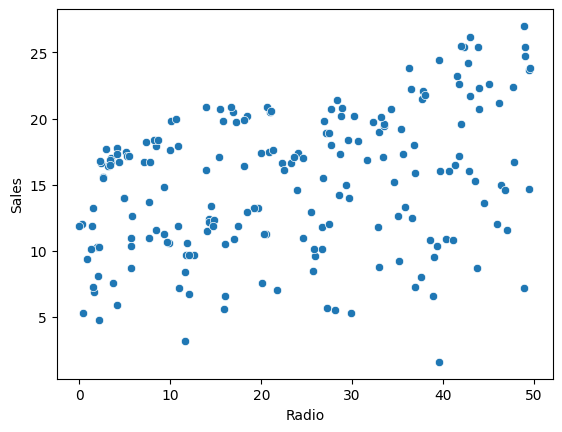

In [29]:
# Plotting a scatter plot

sns.scatterplot( data = data , x = 'Radio' , y = 'Sales') # Advertising spend on radio versus Sales

<Axes: xlabel='Newspaper', ylabel='Sales'>

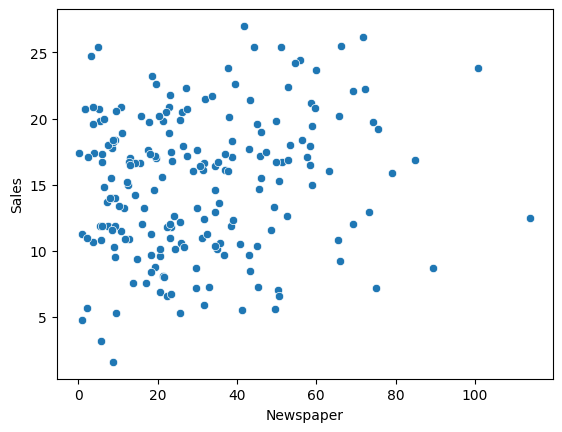

In [30]:
# Plotting a scatter plot

sns.scatterplot( data = data , x = 'Newspaper' , y = 'Sales') # Advertising spend on Newspaper versus Sales

In [31]:
# Linear Regression model

In [32]:
# Splitting the dataset into X and y
X = data[['TV' , 'Newspaper', 'Radio']]
y = np.array(data['Sales']).reshape(-1,1)

In [33]:
# Building the regression model
reg = LinearRegression()
reg.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
# Predictions on the basis of the model
y_pred = reg.predict(X)
# y_pred

In [35]:
# Find the value of r squared
r2_score(y , y_pred) # The three predictors considered explain about 90.25% of the variation in the data

0.9025912899684558

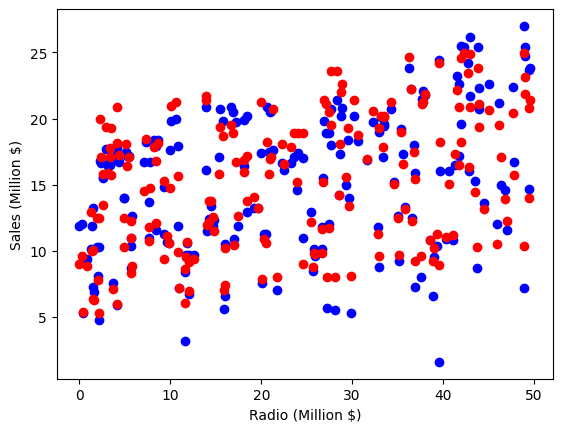

In [36]:
# Visual comparison between predicted and actual values
plt.scatter( X['Radio'] , y , color = 'blue') # actual values
plt.scatter( X['Radio'] , y_pred , color = 'red' ) # predicted values
plt.xlabel("Radio (Million $)")
plt.ylabel("Sales (Million $)")
plt.show()

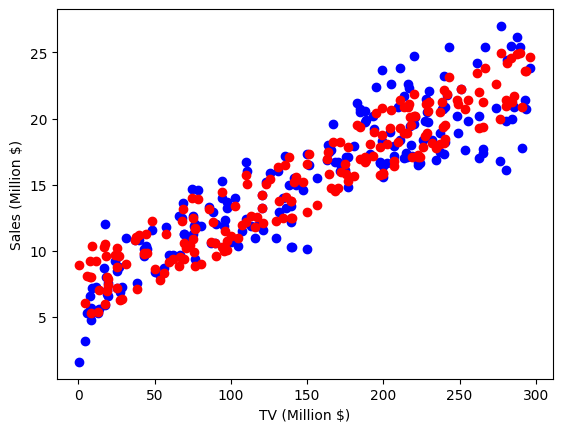

In [37]:
plt.scatter( X['TV'] , y , color = 'blue') # actual values
plt.scatter( X['TV'] , y_pred , color = 'red' ) # predicted values
plt.xlabel("TV (Million $)")
plt.ylabel("Sales (Million $)")
plt.show()

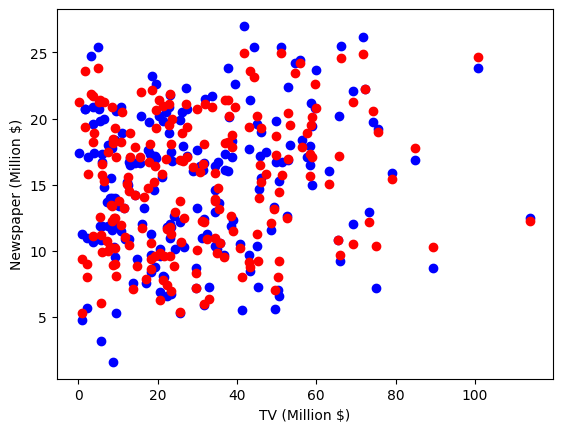

In [38]:
plt.scatter( X['Newspaper'] , y , color = 'blue') # actual values
plt.scatter( X['Newspaper'] , y_pred , color = 'red' ) # predicted values
plt.xlabel("TV (Million $)")
plt.ylabel("Newspaper (Million $)")
plt.show()

In [39]:
# Calculate beta coefficients.
print(reg.intercept_)
print(reg.coef_)

[4.62512408]
[[0.05444578 0.00033566 0.10700123]]


In [40]:
# Metrics to give an overall sense of error in the model
rss = np.sum(np.square(y - y_pred))
print(rss)
mse = mean_squared_error(y, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

541.2012295254631
2.706006147627315
1.6449942697855562


In [41]:
# Residual analysis
y_res = y - y_pred
#y_res

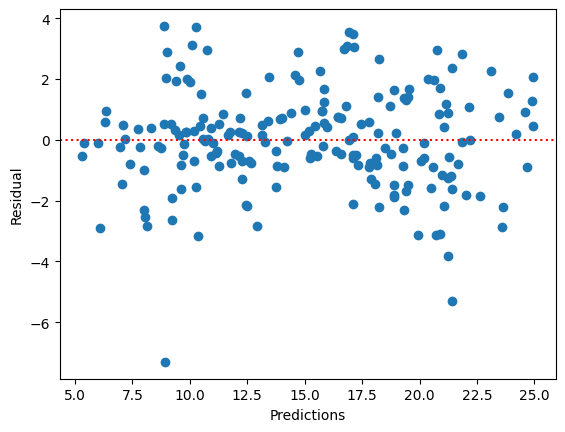

In [42]:
data['res'] = y_res
plt.scatter( y_pred , data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

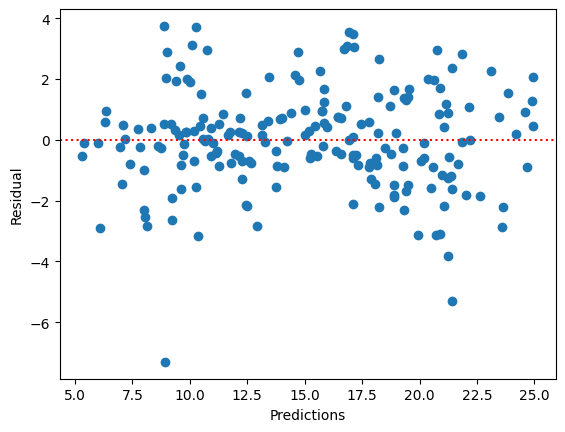

In [43]:
data['res'] = y_res
plt.scatter( y_pred , data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Linear Regression Model Estimates using Matrix Multiplications

In [44]:
# use NumPy’s vstack to create a 2-d numpy array from two 1d-arrays and create X_mat.
X_mat=np.vstack((np.ones(len(X)), X.T)).T

In [45]:
#X_mat

#### $\widehat{\beta}=(X^{T}.X)^{-1}.X^{T}.Y$

In [46]:
# We can implement this using NumPy’s linalg module’s matrix inverse function and matrix multiplication function.
beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)

In [47]:
beta_hat

array([[4.62512408e+00],
       [5.44457803e-02],
       [3.35657922e-04],
       [1.07001228e-01]])

In [48]:
beta_hat_list = [beta_hat[i][0] for i in range(len(beta_hat))]
coefficients = ['b0', 'b1(TV)', 'b2(Radio)', 'b3(Newspaper)']
betas = dict(zip(coefficients, beta_hat_list))

In [49]:
betas

{'b0': np.float64(4.6251240788087244),
 'b1(TV)': np.float64(0.05444578033757067),
 'b2(Radio)': np.float64(0.0003356579223307253),
 'b3(Newspaper)': np.float64(0.10700122823870192)}

### Modeling non-linear relationships using data transformation

Make a model which predicts how much distance is covered by a truck in a given time unit after a break is applied.

In [53]:
dist = pd.read_csv(r"C:\Users\roshi\Desktop\Lenovo\AR - Examples - 1.5.csv")
dist.head()

,time,distance
0,1,0.419660
1,2,1.350692
2,3,2.470342
3,4,1.566856
4,5,1.595280


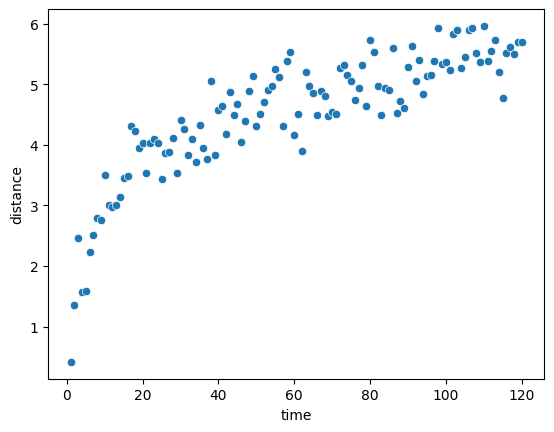

In [54]:
# Plotting a scatter plot
sns.scatterplot( data = dist , x ='time' , y='distance')
plt.show()

In [55]:
# Splitting the dataset into X and y
X = np.array(dist['time']).reshape(-1,1)
y = np.array(dist['distance']).reshape(-1,1)

In [56]:
# Building the regression model
model = LinearRegression()

In [57]:
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [58]:
# Predictions on the basis of the model
y_pred2 = model.predict(X)
# y_pred2

In [59]:
# Find the value of r squared
r2_score(y, y_pred2)

0.7019700219367477

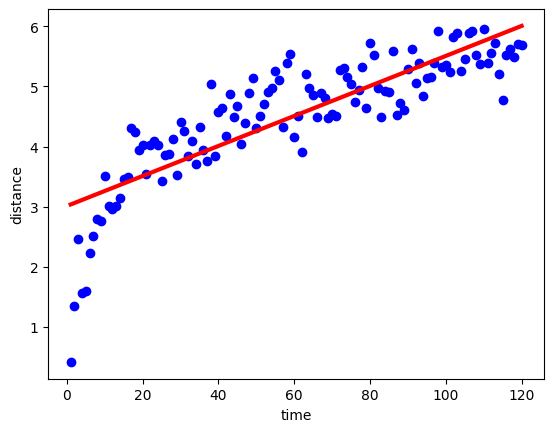

In [60]:
plt.scatter( X , y , color = 'blue')
plt.plot(X , y_pred2 , color = 'red' , linewidth = 3)
plt.xlabel("time")
plt.ylabel("distance")
plt.show()

In [61]:
# Calculate beta0 and beta1.
print(model.intercept_)
print(model.coef_)

[3.01233335]
[[0.02494362]]


In [62]:
# Metrics to give an overall sense of error in the model
rss = np.sum(np.square(y - y_pred2))
print(rss)
mse = mean_squared_error(y, y_pred2)
print(mse)
rmse = mse**0.5
print(rmse)


38.03580844870773
0.3169650704058978
0.5629965101187553


In [63]:
#residual
residual = y - y_pred2

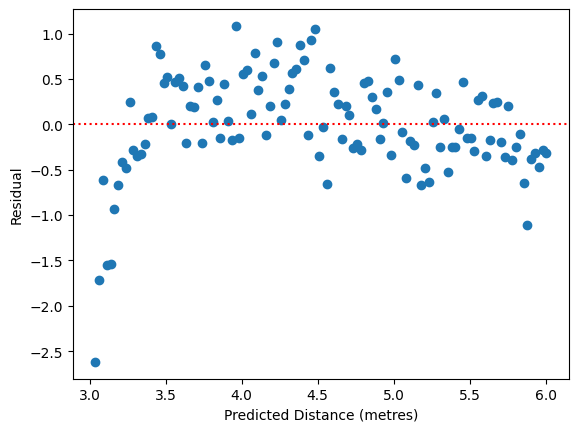

In [64]:
# Scatter plot of the predicted values on the x-axis and the residuals on the y-axis
plt.scatter( y_pred2 , residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted Distance (metres)")
plt.ylabel("Residual")
plt.show()

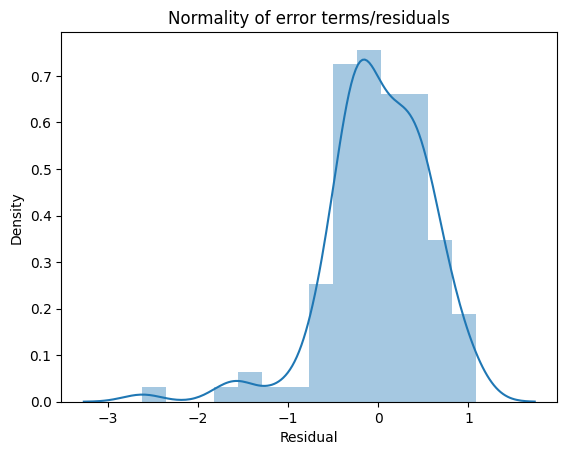

In [65]:
# Distribution of errors
p = sns.distplot(residual,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

In [66]:
# As we can see that the residuals do not fulfill the conditions for linear regression, Lets see if we can make some changes so that the residuals are normally distributed.

dist['time (seconds)(log)'] = np.log(dist['time'])

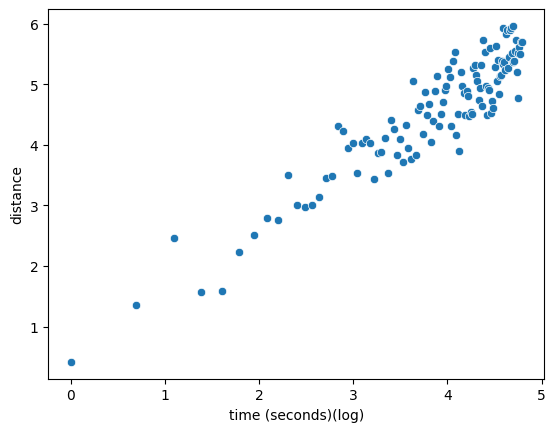

In [67]:
# Plotting a scatter plot
sns.scatterplot( data = dist , x ='time (seconds)(log)' , y='distance')
plt.show()

In [68]:
# Splitting the dataset into X and y
X = np.array(dist['time (seconds)(log)']).reshape(-1,1)
y = np.array(dist['distance']).reshape(-1,1)

In [69]:
# Building the regression model
model = LinearRegression()

model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [70]:
# Predictions on the basis of the model
y_pred2 = model.predict(X)
# y_pred2

In [71]:
# Find the value of r squared
r2_score(y, y_pred2)

0.8717123012103077

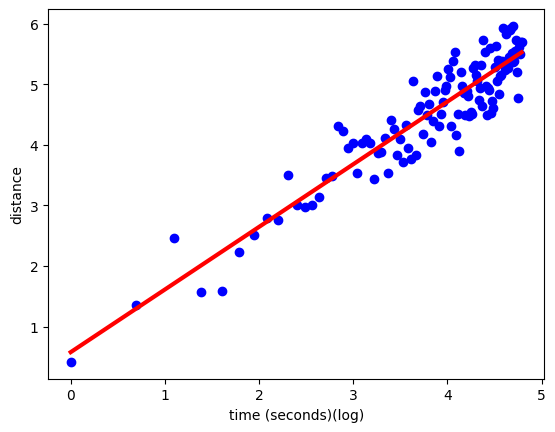

In [72]:
plt.scatter( X , y , color = 'blue')
plt.plot(X , y_pred2 , color = 'red' , linewidth = 3)
plt.xlabel("time (seconds)(log)")
plt.ylabel("distance")
plt.show()

In [73]:
# Calculate beta0 and beta1.
print(model.intercept_)
print(model.coef_)

[0.58066733]
[[1.03293534]]


In [74]:
# Metrics to give an overall sense of error in the model
rss = np.sum(np.square(y - y_pred2))
print(rss)
mse = mean_squared_error(y, y_pred2)
print(mse)
rmse = mse**0.5
print(rmse)

16.372602411340793
0.13643835342783994
0.369375626466934


In [75]:
#residual
residual = y - y_pred2

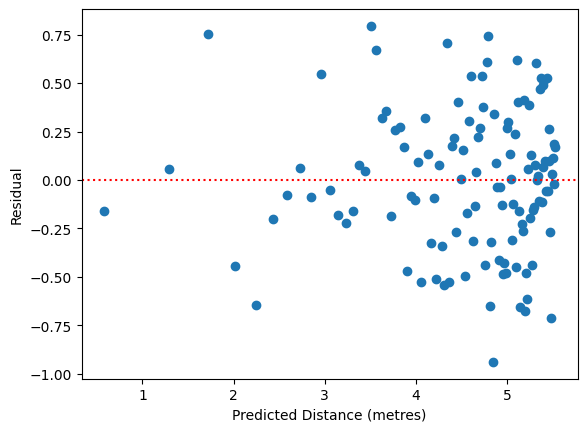

In [76]:
plt.scatter( y_pred2 , residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted Distance (metres)")
plt.ylabel("Residual")
plt.show()

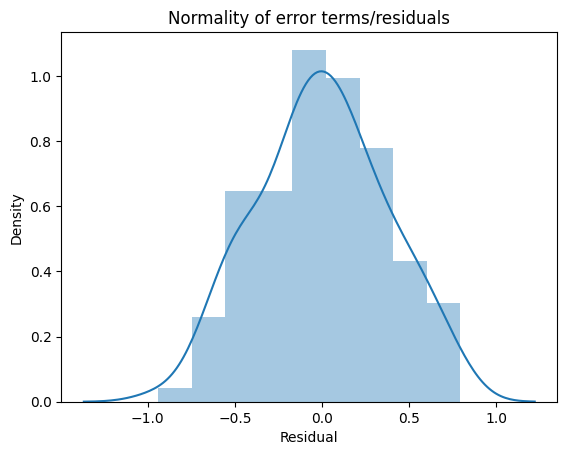

In [77]:

# Distribution of errors
p = sns.distplot(residual,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

### Modeling non-linear relationship using Polynomial Regression

In [78]:
# Model to predict marks given the number of courses taken and the time the student gives to study 
# on a daily basis.
data = pd.read_csv(r"C:\Users\roshi\Desktop\Lenovo\AR - Examples - 1.6.csv")
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


<Axes: xlabel='number_courses', ylabel='Marks'>

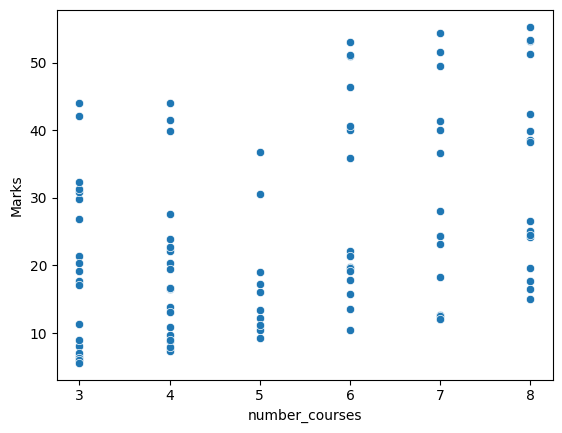

In [79]:
# Plotting a scatter plot
sns.scatterplot( data = data , x = 'number_courses' , y = 'Marks')

<Axes: xlabel='time_study', ylabel='Marks'>

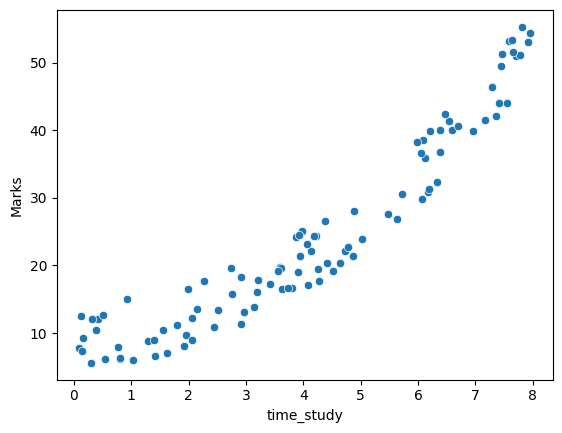

In [80]:
# Plotting a scatter plot
sns.scatterplot( data = data , x = 'time_study' , y = 'Marks')

In [81]:
# Splitting the dataset into X and y
X = data[['number_courses' , 'time_study']]
y = np.array(data['Marks']).reshape(-1,1)

In [82]:
# Building the regression model
reg = LinearRegression()
reg.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [83]:
# Predictions on the basis of the model
y_pred = reg.predict(X)
#y_pred

In [84]:
# Find the value of r squared
r2_score(y , y_pred)

0.9403656320238896

In [85]:
# Calculate beta0 and beta1.
print(reg.intercept_)
print(reg.coef_)

[-7.45634623]
[[1.86405074 5.39917879]]


In [86]:
# Metrics to give an overall sense of error in the model
rss = np.sum(np.square(y - y_pred))
print(rss)
mse = mean_squared_error(y, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

1211.6962069108952
12.116962069108952
3.4809426983374707


In [87]:
# Residual analysis
y_res = y - y_pred
#y_res

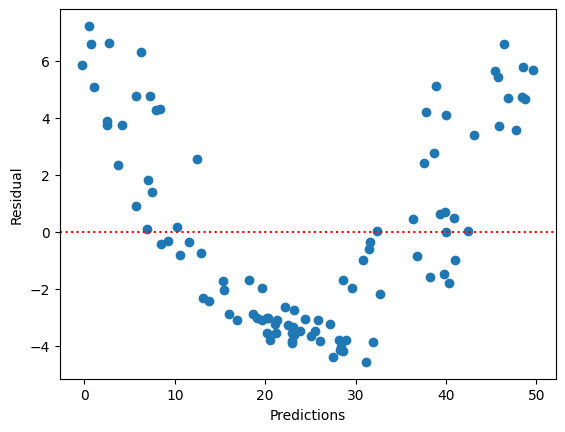

In [88]:
data['res'] = y_res
plt.scatter( y_pred , data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

Checking which variable is non-linearly related to the response value

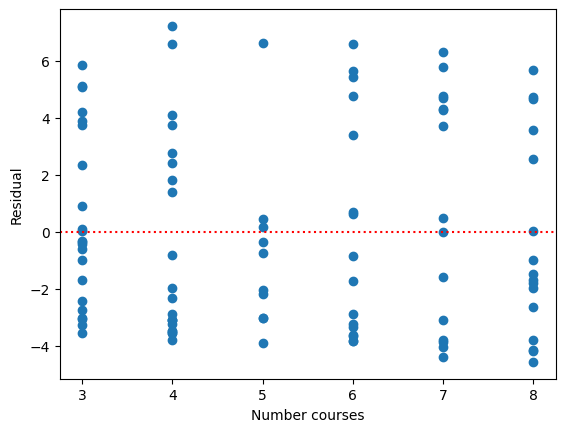

In [89]:
data['res'] = y_res
plt.scatter( data['number_courses'] , data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Number courses")
plt.ylabel("Residual")
plt.show()

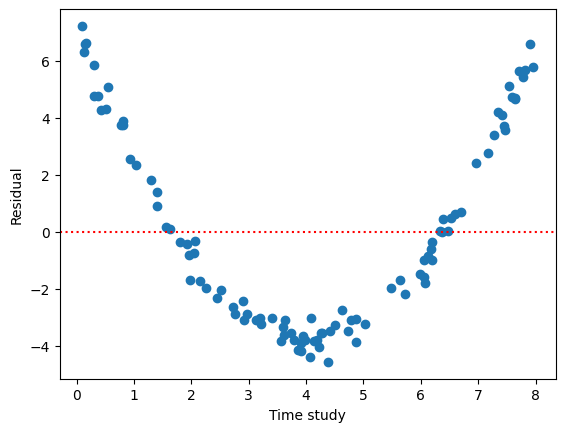

In [90]:
plt.scatter( data['time_study'] , data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Time study")
plt.ylabel("Residual")
plt.show()

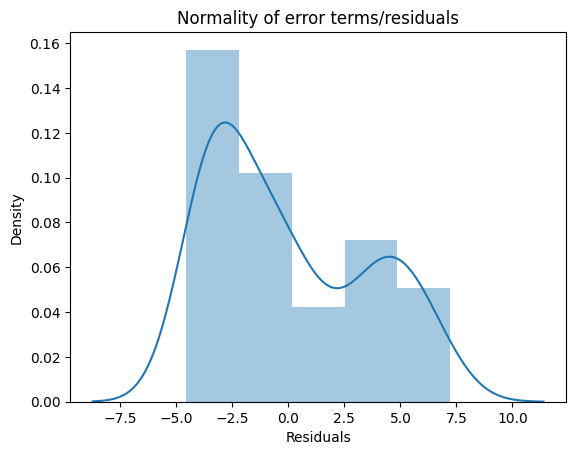

In [91]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Fitting Polynomial Regression Model 

In [92]:
# Transforming the time_study variable
data['time_study_squared'] = data['time_study']*data['time_study']

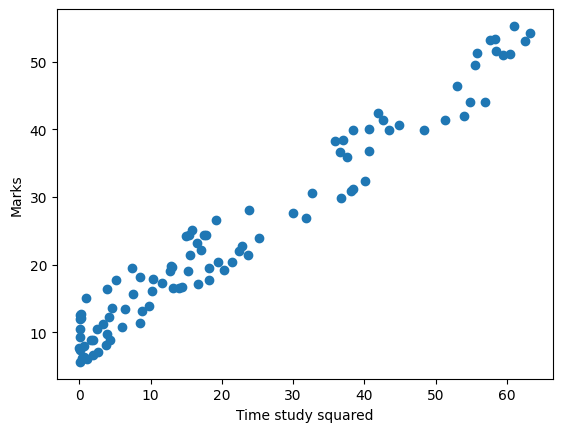

In [93]:
plt.scatter( data['time_study_squared'] , data['Marks'])
plt.xlabel("Time study squared")
plt.ylabel("Marks")
plt.show()

In [94]:
# Splitting the dataset into X and y
X = data[['number_courses' , 'time_study', 'time_study_squared']] 
y = np.array(data['Marks']).reshape(-1,1)

In [95]:
# Building the regression model
reg = LinearRegression()
reg.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [96]:
# Predictions on the basis of the model
y_pred = reg.predict(X)
# y_pred

In [97]:
# Find the value of r squared
r2_score(y , y_pred)

0.9996529294889802

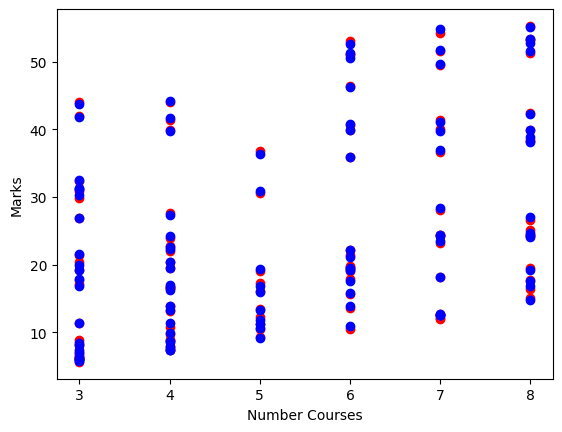

In [98]:
plt.scatter( X['number_courses'] , y , color = 'red')
plt.scatter( X['number_courses'] , y_pred , color = 'blue' )
plt.xlabel("Number Courses")
plt.ylabel("Marks")
plt.show()

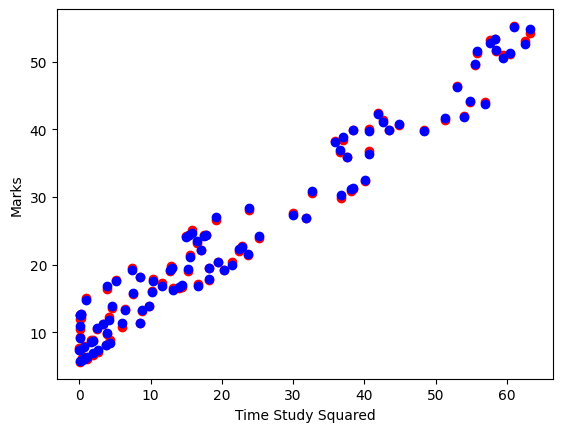

In [99]:
plt.scatter( X['time_study_squared'] , y , color = 'red')
plt.scatter( X['time_study_squared'] , y_pred , color = 'blue' )
plt.xlabel("Time Study Squared")
plt.ylabel("Marks")
plt.show()

In [100]:
# Calculate beta0 and beta1.
print(reg.intercept_)
print(reg.coef_)

[0.56299581]
[[ 1.70546941 -0.02855268  0.67346253]]


In [101]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y - y_pred))
print(rss)
mse = mean_squared_error(y, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

7.052041230683791
0.0705204123068379
0.2655567967626472


In [102]:
# Residual analysis
y_res = y - y_pred
#y_res

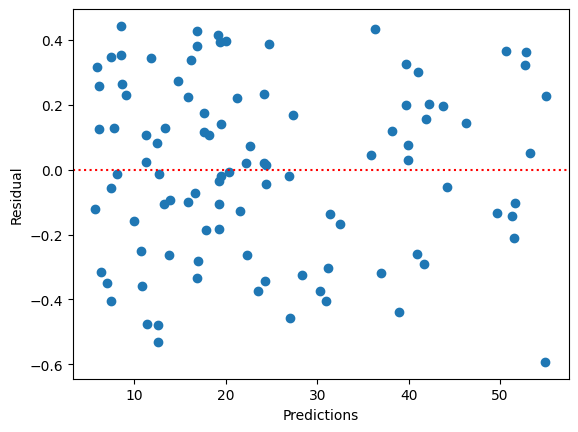

In [103]:
data['res'] = y_res
plt.scatter( y_pred , data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

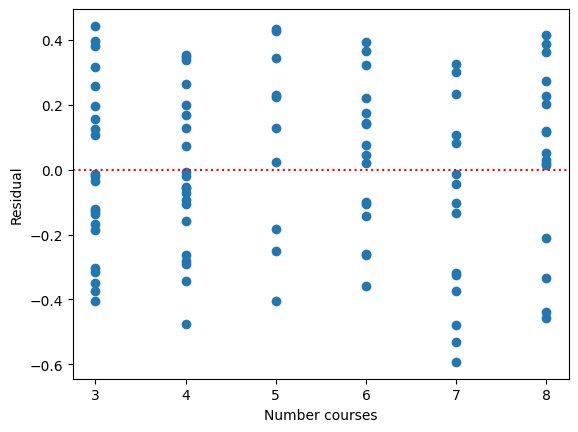

In [104]:
data['res'] = y_res
plt.scatter( data['number_courses'] , data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Number courses")
plt.ylabel("Residual")
plt.show()

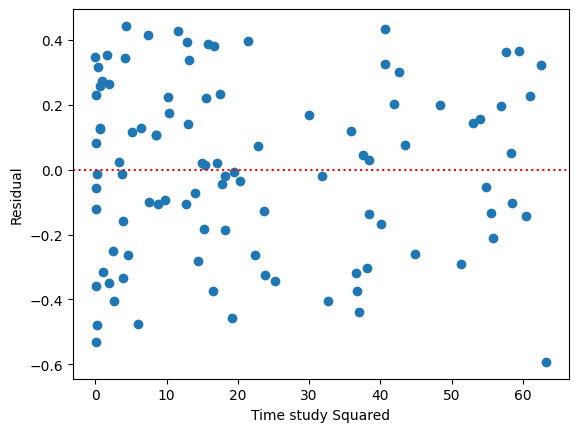

In [105]:
plt.scatter( data['time_study_squared'] , data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Time study Squared")
plt.ylabel("Residual")
plt.show()

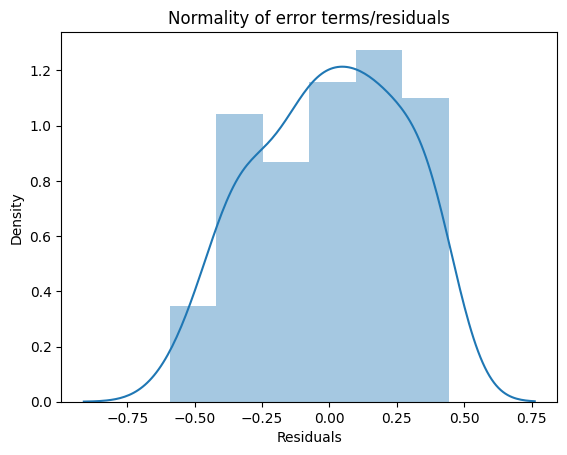

In [106]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()